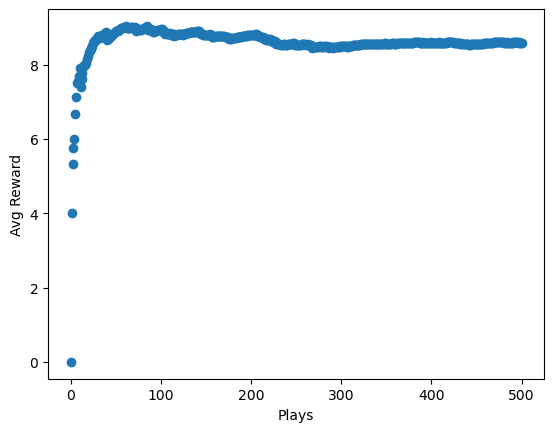

In [75]:
"""
This marks the first page investigating how Deep Reinforcement Learning works and how to apply it. 
The first problem will be the multi-arm bandit problem, where we try to train an algorithm to search for the best strategy in a casino of 10 slot machines.
The premise is that there is no cost on each machine, we simply have to find which returns the highest average. 
"""

import numpy as np
import matplotlib.pyplot as plt
import random 

def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] = new_r
    return record

def get_best_arm(record):
    arm_index = np.argmax(record[:, 1], axis=0)
    return arm_index

# epsilon-greedy strategy -> exploration epsilon times, exploitation (1-epsilon) times
n = 10
eps = 0.2

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Plays')
ax.set_ylabel('Avg Reward')
record = np.zeros((n, 2))
probs = np.random.rand(n)

rewards = [0]

for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else: 
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)

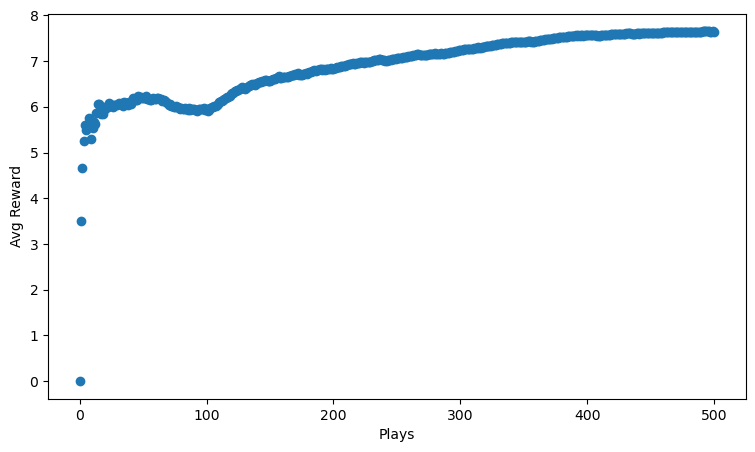

In [76]:
# using softmax to choose the optimal action instead of epsilon greedy approach

def softmax(av, tau=1.12):
    softmax = np.exp(av / tau) / np.sum(np.exp(av / tau))
    return softmax

n = 10
probs = np.random.rand(n)
record = np.zeros((n, 2))

fig, ax = plt.subplots(1,1) 
ax.set_xlabel('Plays')
ax.set_ylabel('Avg Reward')
fig.set_size_inches(9, 5)

rewards = [0]
for i in range(500): 
    p = softmax(record[:, 1])
    choice = np.random.choice(np.arange(n), p=p)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2)
    rewards.append(mean_reward)
    
ax.scatter(np.arange(len(rewards)), rewards)